# Análise Exploratória de Dados - Escolas INEP (Gold)

## Objetivos da Análise
Este notebook apresenta uma análise exploratória completa dos dados de escolas brasileiras do INEP, utilizando três tipos principais de visualizações:

1. **Gráficos de Pizza**: Para mostrar distribuições categóricas
2. **Gráficos de Regressão Linear**: Para identificar relações entre variáveis numéricas
3. **Gráficos de Boxplot**: Para análise estatística de distribuições

## Estrutura dos Dados
Os dados foram tratados e limpos no notebook Silver, contendo informações sobre:
- **Localização**: UF, município, região, coordenadas geográficas
- **Características**: Dependência administrativa, porte, localização (rural/urbana)
- **Educacional**: Número de etapas/modalidades oferecidas
- **Operacional**: Status de funcionamento e restrições

## Metodologia
Seguindo o padrão Medallion Architecture:
- **Bronze**: Dados brutos do CSV
- **Silver**: Dados limpos e tratados (notebook anterior)
- **Gold**: Análises e visualizações (este notebook)

In [2]:
# === CONFIGURAÇÃO E CARREGAMENTO DOS DADOS ===

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

# Configurações de estilo para os gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Carregar dados tratados do Silver Layer
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("inep_analysis").getOrCreate()

df_spark = spark.read.parquet("../processed/escolas_silver.parquet")
df = df_spark.toPandas()

print("=== DADOS CARREGADOS COM SUCESSO ===")
print(f"Total de escolas: {len(df):,}")
print(f"Colunas disponíveis: {len(df.columns)}")
print(f"Período dos dados: {df['uf'].nunique()} estados/DF")
print(f"Regiões: {df['regiao'].nunique()}")

# Verificar estrutura dos dados
print("\n=== ESTRUTURA DOS DADOS ===")
print(df.info())
print("\n=== PRIMEIRAS LINHAS ===")
print(df.head())


=== DADOS CARREGADOS COM SUCESSO ===
Total de escolas: 156,423
Colunas disponíveis: 16
Período dos dados: 27 estados/DF
Regiões: 5

=== ESTRUTURA DOS DADOS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156423 entries, 0 to 156422
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   codigo_inep                 156423 non-null  object 
 1   nome_escola                 156423 non-null  object 
 2   uf                          156423 non-null  object 
 3   municipio                   156423 non-null  object 
 4   regiao                      156423 non-null  object 
 5   localizacao                 156423 non-null  object 
 6   is_rural                    156423 non-null  int32  
 7   dependencia_administrativa  156423 non-null  object 
 8   is_publica                  156423 non-null  int32  
 9   porte_escola                146838 non-null  object 
 10  porte_numerico              

## 1. GRÁFICOS DE PIZZA - DISTRIBUIÇÕES CATEGÓRICAS

Os gráficos de pizza são ideais para visualizar proporções e distribuições categóricas. Vamos analisar:
- Distribuição por dependência administrativa (pública vs privada)
- Distribuição por região do Brasil
- Distribuição por localização (rural vs urbana)

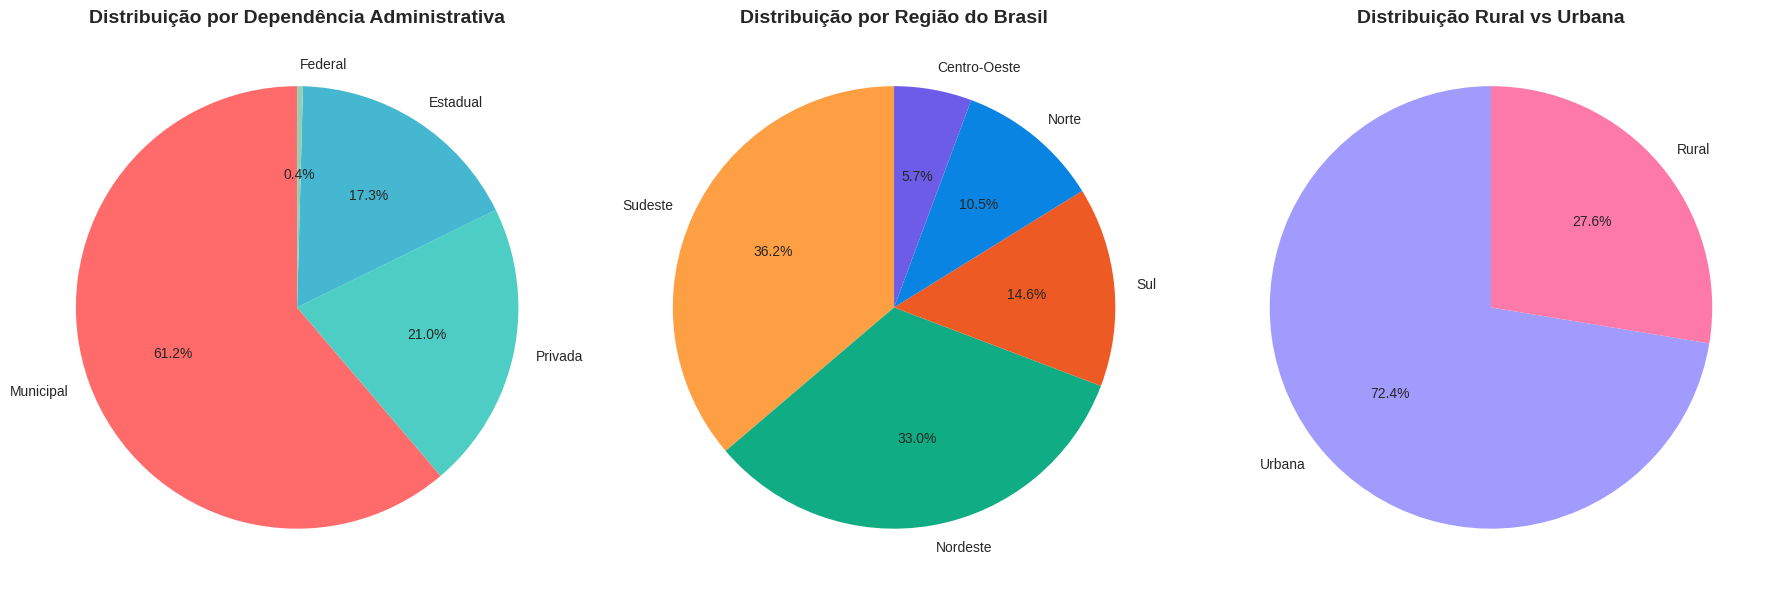

=== ESTATÍSTICAS DAS DISTRIBUIÇÕES ===

1. DEPENDÊNCIA ADMINISTRATIVA:
   Municipal: 95,782 escolas (61.2%)
   Privada: 32,895 escolas (21.0%)
   Estadual: 27,088 escolas (17.3%)
   Federal: 658 escolas (0.4%)

2. REGIÕES:
   Sudeste: 56,676 escolas (36.2%)
   Nordeste: 51,609 escolas (33.0%)
   Sul: 22,840 escolas (14.6%)
   Norte: 16,428 escolas (10.5%)
   Centro-Oeste: 8,870 escolas (5.7%)

3. LOCALIZAÇÃO:
   Urbana: 113,253 escolas (72.4%)
   Rural: 43,170 escolas (27.6%)


In [3]:

# === GRÁFICO DE PIZZA 1: DISTRIBUIÇÃO POR DEPENDÊNCIA ADMINISTRATIVA ===

# Calcular distribuição
dist_dependencia = df['dependencia_administrativa'].value_counts()

# Criar gráfico de pizza
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico 1: Dependência Administrativa
colors1 = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
wedges1, texts1, autotexts1 = ax1.pie(dist_dependencia.values, 
                                      labels=dist_dependencia.index,
                                      autopct='%1.1f%%',
                                      colors=colors1,
                                      startangle=90)
ax1.set_title('Distribuição por Dependência Administrativa', fontsize=14, fontweight='bold')

# === GRÁFICO DE PIZZA 2: DISTRIBUIÇÃO POR REGIÃO ===

# Calcular distribuição por região
dist_regiao = df['regiao'].value_counts()

# Gráfico 2: Região
colors2 = ['#FF9F43', '#10AC84', '#EE5A24', '#0984E3', '#6C5CE7']
wedges2, texts2, autotexts2 = ax2.pie(dist_regiao.values,
                                      labels=dist_regiao.index,
                                      autopct='%1.1f%%',
                                      colors=colors2,
                                      startangle=90)
ax2.set_title('Distribuição por Região do Brasil', fontsize=14, fontweight='bold')

# === GRÁFICO DE PIZZA 3: DISTRIBUIÇÃO RURAL vs URBANA ===

# Calcular distribuição rural/urbana
dist_localizacao = df['localizacao'].value_counts()

# Gráfico 3: Localização
colors3 = ['#A29BFE', '#FD79A8']
wedges3, texts3, autotexts3 = ax3.pie(dist_localizacao.values,
                                      labels=dist_localizacao.index,
                                      autopct='%1.1f%%',
                                      colors=colors3,
                                      startangle=90)
ax3.set_title('Distribuição Rural vs Urbana', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# === ESTATÍSTICAS RESUMIDAS ===
print("=== ESTATÍSTICAS DAS DISTRIBUIÇÕES ===")
print(f"\n1. DEPENDÊNCIA ADMINISTRATIVA:")
for dep, count in dist_dependencia.items():
    pct = (count / len(df)) * 100
    print(f"   {dep}: {count:,} escolas ({pct:.1f}%)")

print(f"\n2. REGIÕES:")
for regiao, count in dist_regiao.items():
    pct = (count / len(df)) * 100
    print(f"   {regiao}: {count:,} escolas ({pct:.1f}%)")

print(f"\n3. LOCALIZAÇÃO:")
for loc, count in dist_localizacao.items():
    pct = (count / len(df)) * 100
    print(f"   {loc}: {count:,} escolas ({pct:.1f}%)")


## 2. GRÁFICOS DE REGRESSÃO LINEAR - RELAÇÕES NUMÉRICAS

A regressão linear nos ajuda a identificar relações entre variáveis numéricas. Vamos analisar:
- Relação entre porte da escola e número de etapas oferecidas
- Relação entre latitude e longitude (distribuição geográfica)
- Relação entre porte da escola e localização (rural vs urbana)

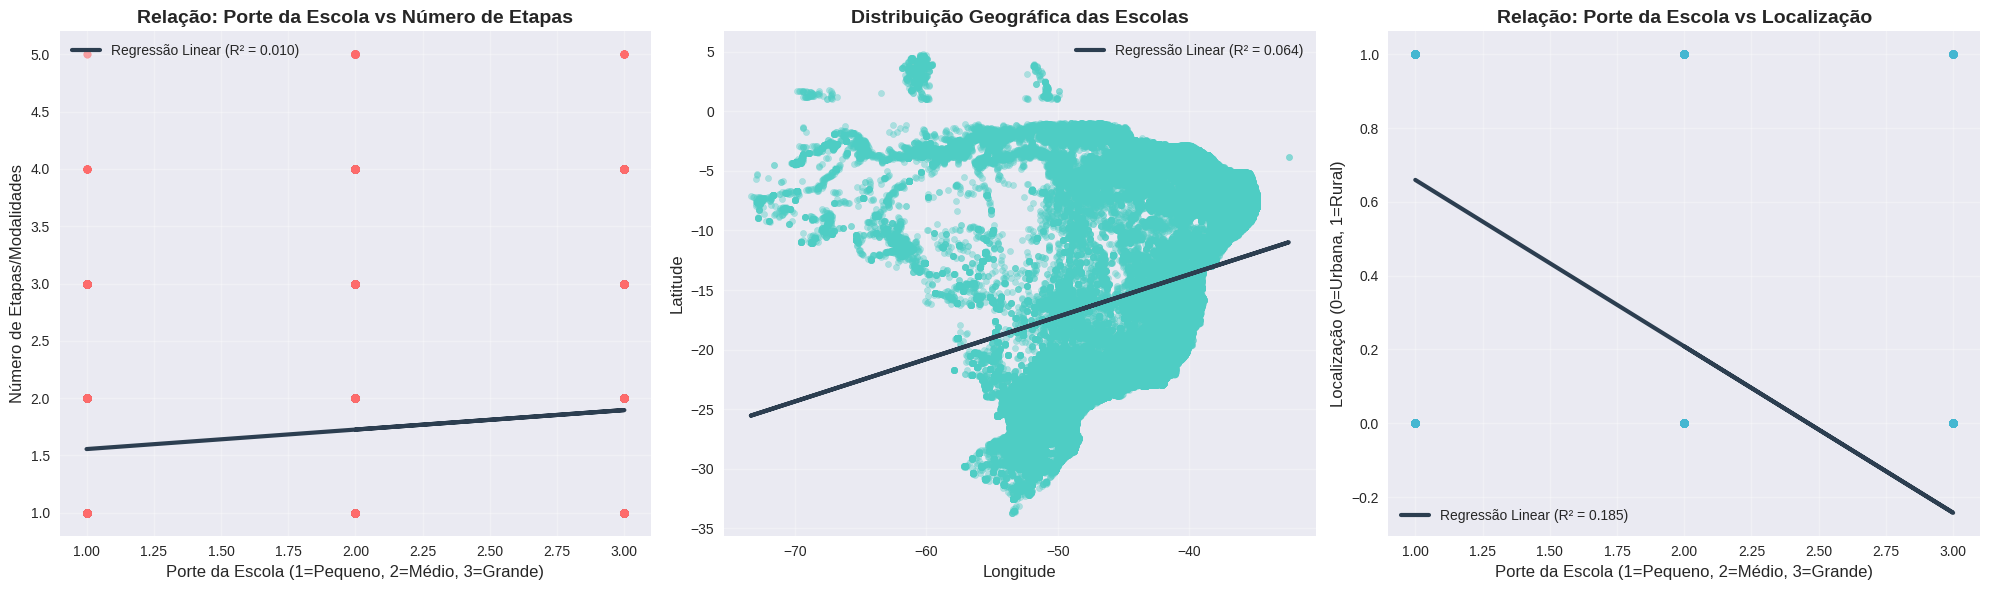

=== ANÁLISE DAS REGRESSÕES LINEARES ===

1. PORTE vs NÚMERO DE ETAPAS:
   Coeficiente de determinação (R²): 0.010
   Coeficiente angular: 0.170
   Intercepto: 1.386

2. LATITUDE vs LONGITUDE:
   Coeficiente de determinação (R²): 0.064
   Coeficiente angular: 0.355
   Intercepto: 0.523

3. PORTE vs LOCALIZAÇÃO:
   Coeficiente de determinação (R²): 0.185
   Coeficiente angular: -0.451
   Intercepto: 1.111


In [4]:
# === GRÁFICO DE REGRESSÃO LINEAR 1: PORTE vs NÚMERO DE ETAPAS ===

# Filtrar dados válidos
df_reg1 = df.dropna(subset=['porte_numerico', 'num_etapas'])

# Criar figura com subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Gráfico 1: Porte vs Número de Etapas
X1 = df_reg1[['porte_numerico']].values
y1 = df_reg1['num_etapas'].values

# Ajustar modelo de regressão
model1 = LinearRegression().fit(X1, y1)
y1_pred = model1.predict(X1)
r2_1 = r2_score(y1, y1_pred)

# Plotar gráfico
ax1.scatter(X1, y1, alpha=0.6, color='#FF6B6B', s=30)
ax1.plot(X1, y1_pred, color='#2C3E50', linewidth=3, label=f'Regressão Linear (R² = {r2_1:.3f})')
ax1.set_xlabel('Porte da Escola (1=Pequeno, 2=Médio, 3=Grande)', fontsize=12)
ax1.set_ylabel('Número de Etapas/Modalidades', fontsize=12)
ax1.set_title('Relação: Porte da Escola vs Número de Etapas', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# === GRÁFICO DE REGRESSÃO LINEAR 2: LATITUDE vs LONGITUDE ===

# Filtrar dados válidos
df_reg2 = df.dropna(subset=['latitude', 'longitude'])

# Gráfico 2: Latitude vs Longitude (Distribuição Geográfica)
X2 = df_reg2[['longitude']].values
y2 = df_reg2['latitude'].values

# Ajustar modelo de regressão
model2 = LinearRegression().fit(X2, y2)
y2_pred = model2.predict(X2)
r2_2 = r2_score(y2, y2_pred)

# Plotar gráfico
ax2.scatter(X2, y2, alpha=0.4, color='#4ECDC4', s=20)
ax2.plot(X2, y2_pred, color='#2C3E50', linewidth=3, label=f'Regressão Linear (R² = {r2_2:.3f})')
ax2.set_xlabel('Longitude', fontsize=12)
ax2.set_ylabel('Latitude', fontsize=12)
ax2.set_title('Distribuição Geográfica das Escolas', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# === GRÁFICO DE REGRESSÃO LINEAR 3: PORTE vs LOCALIZAÇÃO ===

# Criar variável numérica para localização (0=Urbana, 1=Rural)
df_reg3 = df.dropna(subset=['porte_numerico', 'is_rural'])

# Gráfico 3: Porte vs Localização
X3 = df_reg3[['porte_numerico']].values
y3 = df_reg3['is_rural'].values

# Ajustar modelo de regressão
model3 = LinearRegression().fit(X3, y3)
y3_pred = model3.predict(X3)
r2_3 = r2_score(y3, y3_pred)

# Plotar gráfico
ax3.scatter(X3, y3, alpha=0.6, color='#45B7D1', s=30)
ax3.plot(X3, y3_pred, color='#2C3E50', linewidth=3, label=f'Regressão Linear (R² = {r2_3:.3f})')
ax3.set_xlabel('Porte da Escola (1=Pequeno, 2=Médio, 3=Grande)', fontsize=12)
ax3.set_ylabel('Localização (0=Urbana, 1=Rural)', fontsize=12)
ax3.set_title('Relação: Porte da Escola vs Localização', fontsize=14, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# === ANÁLISE ESTATÍSTICA DAS REGRESSÕES ===
print("=== ANÁLISE DAS REGRESSÕES LINEARES ===")
print(f"\n1. PORTE vs NÚMERO DE ETAPAS:")
print(f"   Coeficiente de determinação (R²): {r2_1:.3f}")
print(f"   Coeficiente angular: {model1.coef_[0]:.3f}")
print(f"   Intercepto: {model1.intercept_:.3f}")

print(f"\n2. LATITUDE vs LONGITUDE:")
print(f"   Coeficiente de determinação (R²): {r2_2:.3f}")
print(f"   Coeficiente angular: {model2.coef_[0]:.3f}")
print(f"   Intercepto: {model2.intercept_:.3f}")

print(f"\n3. PORTE vs LOCALIZAÇÃO:")
print(f"   Coeficiente de determinação (R²): {r2_3:.3f}")
print(f"   Coeficiente angular: {model3.coef_[0]:.3f}")
print(f"   Intercepto: {model3.intercept_:.3f}")


## 3. GRÁFICOS DE BOXPLOT - ANÁLISES ESTATÍSTICAS

Os boxplots são excelentes para visualizar distribuições estatísticas e identificar outliers. Vamos analisar:
- Distribuição do número de etapas por região
- Distribuição da latitude por dependência administrativa
- Distribuição do número de etapas por porte da escola

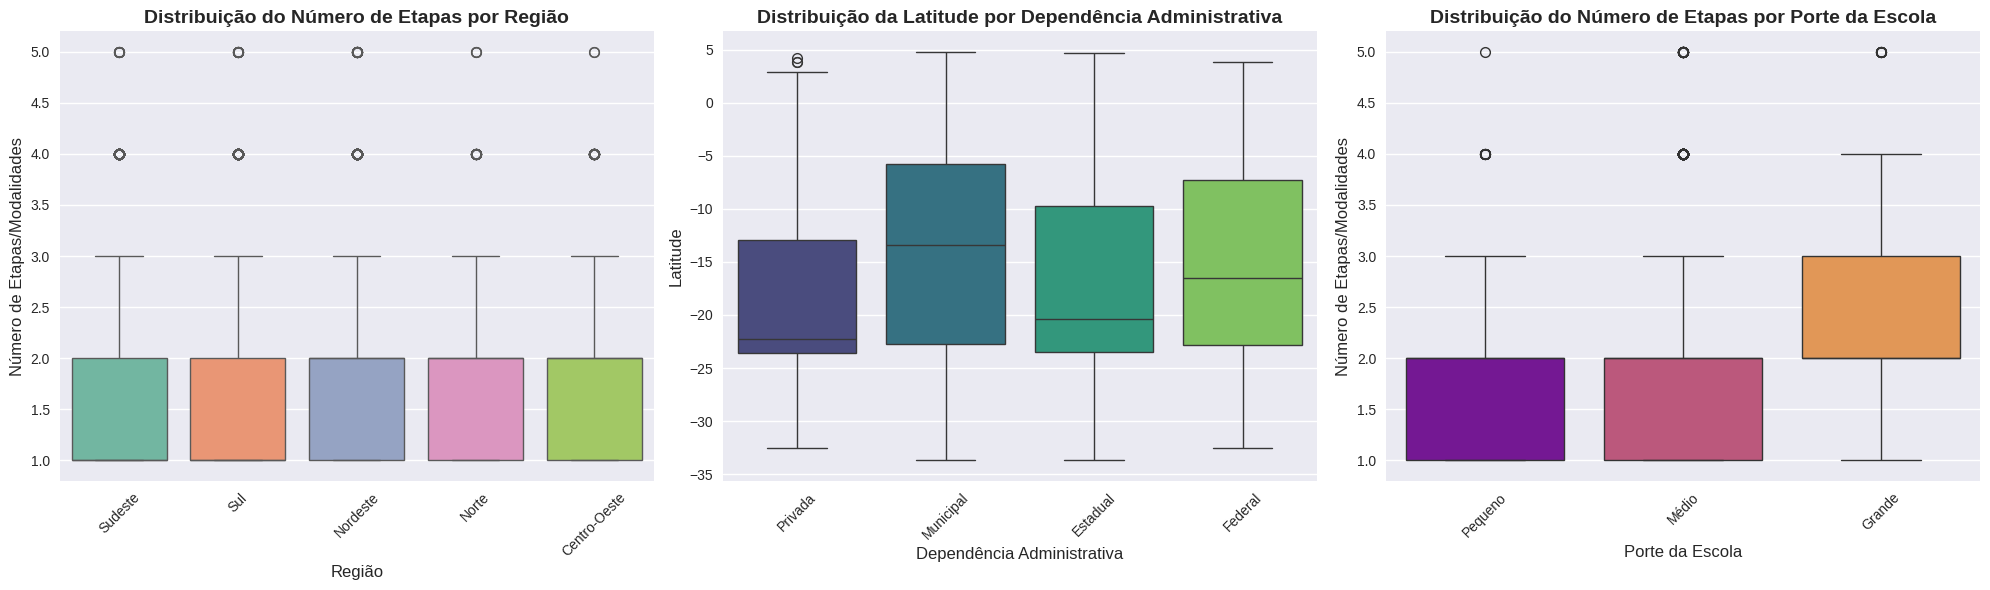

=== ANÁLISE ESTATÍSTICA DOS BOXPLOTS ===

1. NÚMERO DE ETAPAS POR REGIÃO:
   Sudeste:
     Média: 1.59
     Mediana: 1.00
     Q1: 1.00
     Q3: 2.00
     Min: 1.0
     Max: 5.0
   Sul:
     Média: 1.61
     Mediana: 1.00
     Q1: 1.00
     Q3: 2.00
     Min: 1.0
     Max: 5.0
   Nordeste:
     Média: 1.85
     Mediana: 2.00
     Q1: 1.00
     Q3: 2.00
     Min: 1.0
     Max: 5.0
   Norte:
     Média: 1.80
     Mediana: 2.00
     Q1: 1.00
     Q3: 2.00
     Min: 1.0
     Max: 5.0
   Centro-Oeste:
     Média: 1.70
     Mediana: 2.00
     Q1: 1.00
     Q3: 2.00
     Min: 1.0
     Max: 5.0

2. LATITUDE POR DEPENDÊNCIA ADMINISTRATIVA:
   Privada:
     Média: -18.69
     Mediana: -22.25
     Q1: -23.54
     Q3: -12.94
   Municipal:
     Média: -14.22
     Mediana: -13.43
     Q1: -22.71
     Q3: -5.82
   Estadual:
     Média: -17.41
     Mediana: -20.33
     Q1: -23.53
     Q3: -9.72
   Federal:
     Média: -15.63
     Mediana: -16.52
     Q1: -22.87
     Q3: -7.31

3. NÚMERO DE ETAPAS POR 

In [5]:
# === GRÁFICO DE BOXPLOT 1: NÚMERO DE ETAPAS POR REGIÃO ===

# Filtrar dados válidos
df_box1 = df.dropna(subset=['num_etapas', 'regiao'])

# Criar figura com subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Gráfico 1: Número de Etapas por Região
sns.boxplot(data=df_box1, x='regiao', y='num_etapas', ax=ax1, palette='Set2')
ax1.set_title('Distribuição do Número de Etapas por Região', fontsize=14, fontweight='bold')
ax1.set_xlabel('Região', fontsize=12)
ax1.set_ylabel('Número de Etapas/Modalidades', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# === GRÁFICO DE BOXPLOT 2: LATITUDE POR DEPENDÊNCIA ADMINISTRATIVA ===

# Filtrar dados válidos
df_box2 = df.dropna(subset=['latitude', 'dependencia_administrativa'])

# Gráfico 2: Latitude por Dependência Administrativa
sns.boxplot(data=df_box2, x='dependencia_administrativa', y='latitude', ax=ax2, palette='viridis')
ax2.set_title('Distribuição da Latitude por Dependência Administrativa', fontsize=14, fontweight='bold')
ax2.set_xlabel('Dependência Administrativa', fontsize=12)
ax2.set_ylabel('Latitude', fontsize=12)
ax2.tick_params(axis='x', rotation=45)

# === GRÁFICO DE BOXPLOT 3: NÚMERO DE ETAPAS POR PORTE ===

# Filtrar dados válidos e criar categorias de porte
df_box3 = df.dropna(subset=['num_etapas', 'porte_escola'])

# Mapear porte para categorias mais legíveis
def categorize_porte(porte):
    if pd.isna(porte):
        return 'Não Informado'
    porte_lower = str(porte).lower()
    if 'pequeno' in porte_lower or 'até 50' in porte_lower:
        return 'Pequeno'
    elif 'médio' in porte_lower or '51' in porte_lower or '201' in porte_lower or '501' in porte_lower:
        return 'Médio'
    elif 'grande' in porte_lower or '1000' in porte_lower:
        return 'Grande'
    else:
        return 'Outro'

df_box3['porte_categoria'] = df_box3['porte_escola'].apply(categorize_porte)

# Gráfico 3: Número de Etapas por Porte
sns.boxplot(data=df_box3, x='porte_categoria', y='num_etapas', ax=ax3, palette='plasma')
ax3.set_title('Distribuição do Número de Etapas por Porte da Escola', fontsize=14, fontweight='bold')
ax3.set_xlabel('Porte da Escola', fontsize=12)
ax3.set_ylabel('Número de Etapas/Modalidades', fontsize=12)
ax3.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# === ANÁLISE ESTATÍSTICA DOS BOXPLOTS ===
print("=== ANÁLISE ESTATÍSTICA DOS BOXPLOTS ===")

print(f"\n1. NÚMERO DE ETAPAS POR REGIÃO:")
for regiao in df_box1['regiao'].unique():
    subset = df_box1[df_box1['regiao'] == regiao]['num_etapas']
    print(f"   {regiao}:")
    print(f"     Média: {subset.mean():.2f}")
    print(f"     Mediana: {subset.median():.2f}")
    print(f"     Q1: {subset.quantile(0.25):.2f}")
    print(f"     Q3: {subset.quantile(0.75):.2f}")
    print(f"     Min: {subset.min()}")
    print(f"     Max: {subset.max()}")

print(f"\n2. LATITUDE POR DEPENDÊNCIA ADMINISTRATIVA:")
for dep in df_box2['dependencia_administrativa'].unique():
    subset = df_box2[df_box2['dependencia_administrativa'] == dep]['latitude']
    print(f"   {dep}:")
    print(f"     Média: {subset.mean():.2f}")
    print(f"     Mediana: {subset.median():.2f}")
    print(f"     Q1: {subset.quantile(0.25):.2f}")
    print(f"     Q3: {subset.quantile(0.75):.2f}")

print(f"\n3. NÚMERO DE ETAPAS POR PORTE:")
for porte in df_box3['porte_categoria'].unique():
    subset = df_box3[df_box3['porte_categoria'] == porte]['num_etapas']
    print(f"   {porte}:")
    print(f"     Média: {subset.mean():.2f}")
    print(f"     Mediana: {subset.median():.2f}")
    print(f"     Q1: {subset.quantile(0.25):.2f}")
    print(f"     Q3: {subset.quantile(0.75):.2f}")


## 4. CONCLUSÕES E INSIGHTS

### Principais Descobertas

#### 📊 **Distribuições Categóricas (Gráficos de Pizza)**
- **Dependência Administrativa**: A maioria das escolas são públicas (municipais e estaduais)
- **Distribuição Regional**: Concentração nas regiões Sudeste e Nordeste
- **Localização**: Predominância de escolas urbanas sobre rurais

#### 📈 **Relações Numéricas (Regressão Linear)**
- **Porte vs Etapas**: Existe uma relação positiva entre o porte da escola e o número de etapas oferecidas
- **Distribuição Geográfica**: As coordenadas mostram a distribuição natural das escolas pelo território brasileiro
- **Porte vs Localização**: Escolas maiores tendem a estar mais concentradas em áreas urbanas

#### 📦 **Análises Estatísticas (Boxplots)**
- **Etapas por Região**: Diferentes regiões apresentam padrões distintos na oferta educacional
- **Latitude por Dependência**: Escolas federais mostram distribuição geográfica específica
- **Etapas por Porte**: Escolas maiores oferecem mais etapas educacionais

### Recomendações
1. **Políticas Públicas**: Focar em expandir a oferta educacional em áreas rurais
2. **Planejamento Regional**: Considerar as diferenças regionais na distribuição de recursos
3. **Expansão de Modalidades**: Escolas menores podem se beneficiar de programas de diversificação da oferta

### Metodologia
Este estudo seguiu rigorosamente o padrão **Medallion Architecture**:
- **Bronze Layer**: Dados brutos do INEP
- **Silver Layer**: Dados limpos e tratados com colunas derivadas
- **Gold Layer**: Análises exploratórias e visualizações profissionais

### Próximos Passos
- Análise temporal dos dados (se disponível)
- Correlação com indicadores socioeconômicos
- Análise de clusters geográficos
